In [63]:
import numpy as np

class LinearRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            dw = (1/n_samples) * np.dot(X.T, (error))
            db = (1/n_samples) * np.sum(error)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


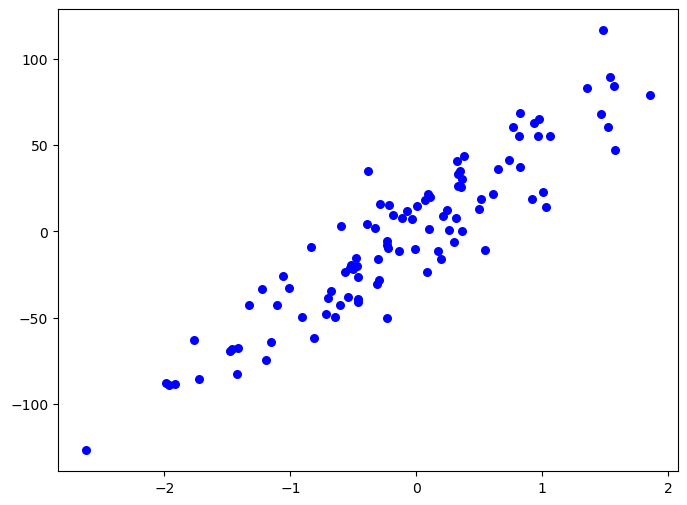

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y, color='b', marker="o", s=30)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print(f"mse is: {mse}")
print(f"RMSE is :{np.sqrt(mse)}")

mse is: 823.2236121371728
RMSE is :28.69187362542176


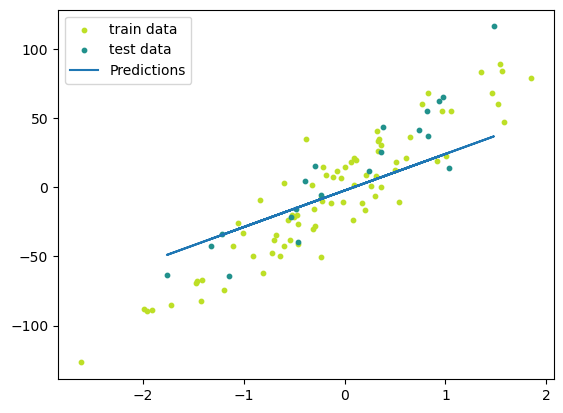

In [66]:
cmap = plt.get_cmap('viridis')
plt.scatter(X_train[:,0], y_train, color=cmap(0.9), s=10, label='train data')
plt.scatter(X_test[:,0], y_test, color=cmap(0.5),s=10, label='test data')
plt.plot(X_test, y_pred, label='Predictions')
plt.legend()
plt.show()

##### Increasing lr

In [67]:
lin_reg = LinearRegression(lr=0.5, n_iters=1500)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print(f"mse is: {mse}")
print(f"RMSE is :{np.sqrt(mse)}")

mse is: 416.808906127481
RMSE is :20.415898366897327


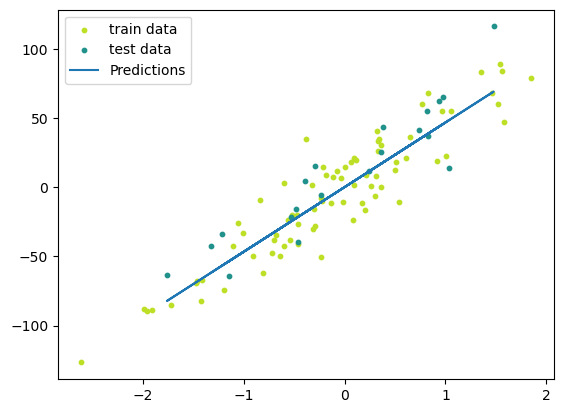

In [68]:
cmap = plt.get_cmap('viridis')
plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label='train data')
plt.scatter(X_test, y_test, color=cmap(0.5),s=10, label='test data')
plt.plot(X_test, y_pred, label='Predictions')
plt.legend()
plt.show()

In [69]:
import pandas as pd
pd.DataFrame({
    'Test':y_test,
    'Pred':y_pred
})

,Test,Pred
0,-42.458212,-61.890619
1,116.377367,69.285947
2,54.902670,38.181804
3,4.544398,-18.131539
4,-5.475043,-10.747585
5,15.670897,-13.437440
6,-39.291796,-21.573147
7,-63.062273,-82.218859
8,37.224352,38.620138
9,62.687202,43.733242
